In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Sales prediction

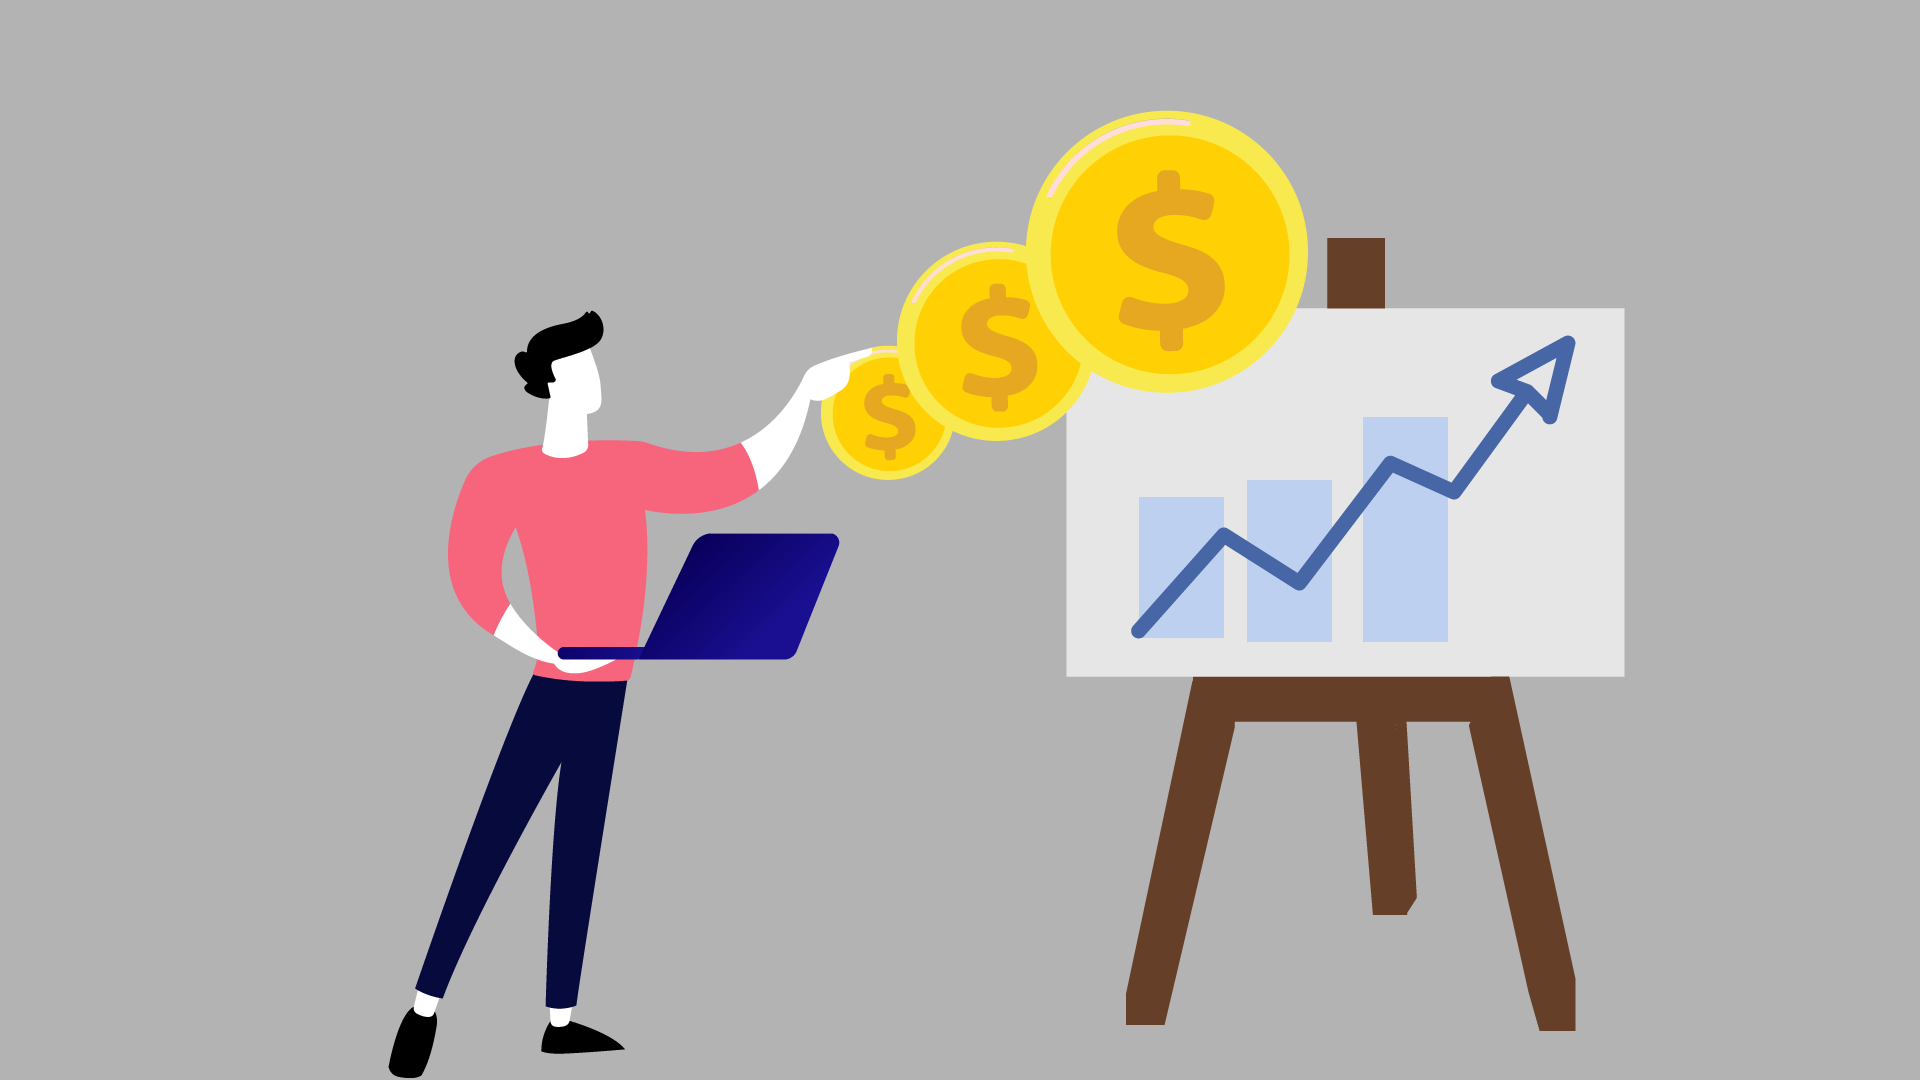

## Introduction

Welcome to the Sales Price Prediction Notebook! In this notebook, we will explore the world of predictive analytics using a linear regression model to predict sales prices based on advertising spending. Sales prediction is a critical task for businesses as it allows them to make informed decisions about their marketing budgets and strategies.

# Data Exploring

In [125]:
data=pd.read_csv(r"C:\Users\mohamed\Downloads\data\Advertising.csv")

In [126]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [127]:
data=data.drop('Unnamed: 0',axis=1)

In [128]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [129]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [131]:
data.duplicated().sum()

0

# EDA

In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [133]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


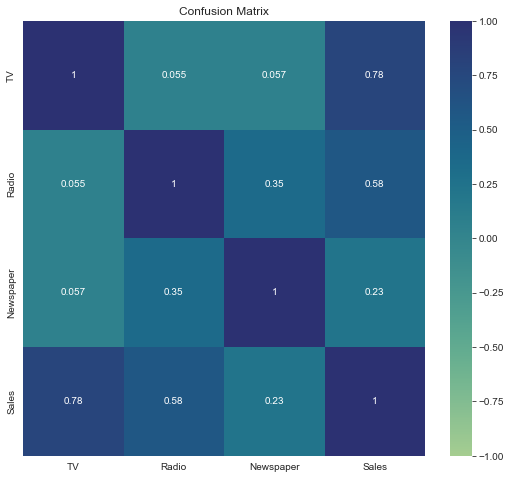

In [134]:
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap="crest")
plt.title("Confusion Matrix")
plt.show()

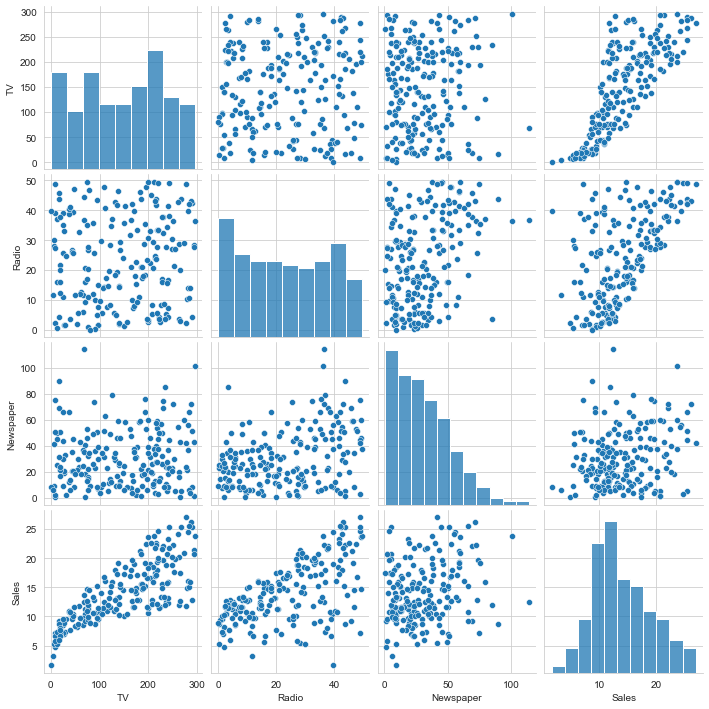

In [135]:
sns.pairplot(data)
plt.show()

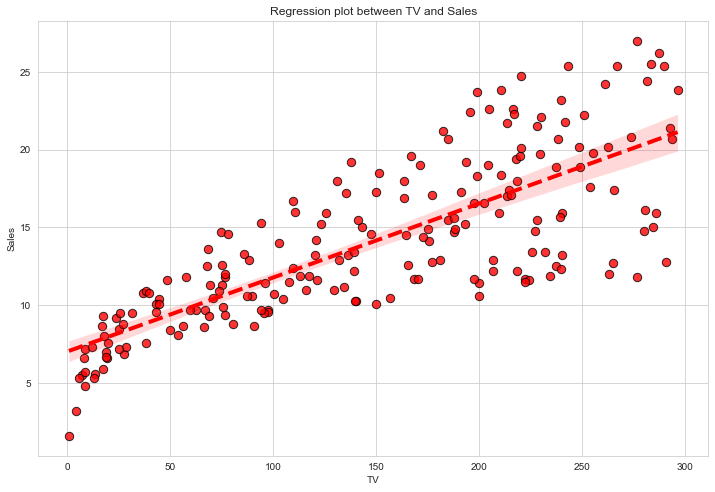

In [136]:
plt.figure(figsize=(12,8))
sns.regplot(data=data,x='TV',y='Sales',color='r',scatter_kws={'s':70,'edgecolor':'black'},line_kws={'lw':4,'ls':'--'})
plt.title("Regression plot between TV and Sales")
plt.show()

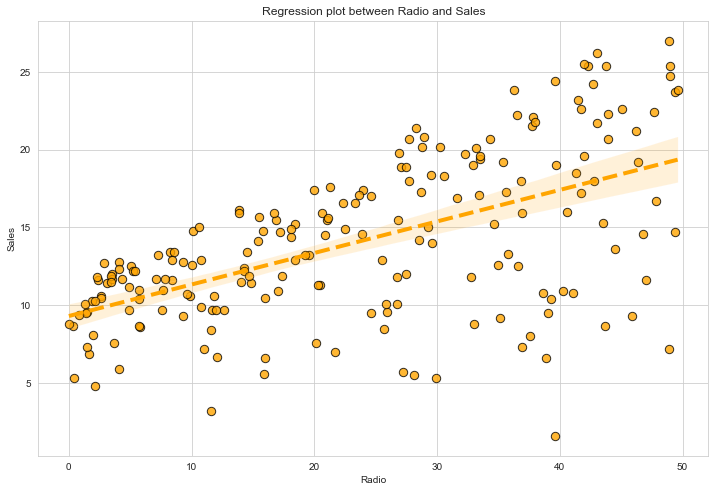

In [137]:
plt.figure(figsize=(12,8))
sns.regplot(data=data,x='Radio',y='Sales',color='orange',scatter_kws={'s':70,'edgecolor':'black'},line_kws={'lw':4,'ls':'--'})
plt.title("Regression plot between Radio and Sales")
plt.show()

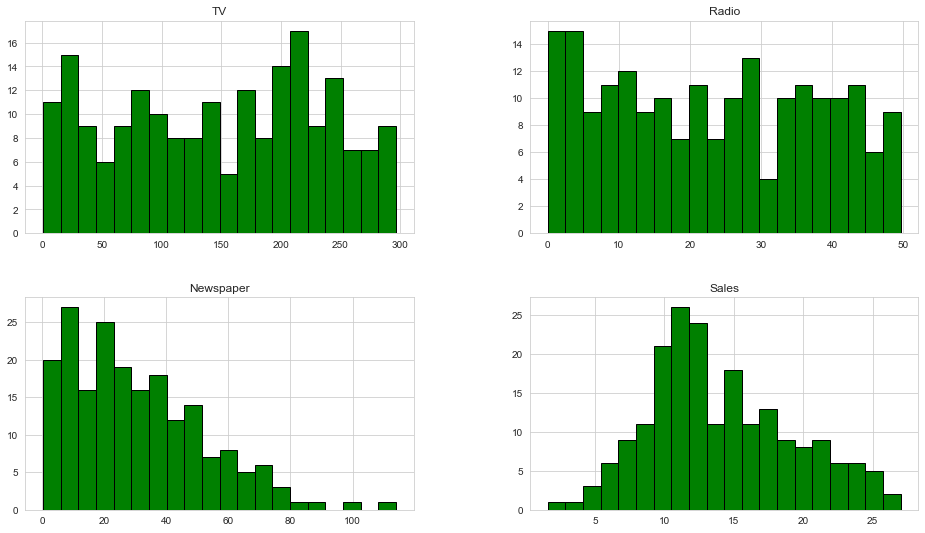

In [138]:

data.hist(bins=20, figsize=(16, 9),color='green',edgecolor='black')

plt.show()

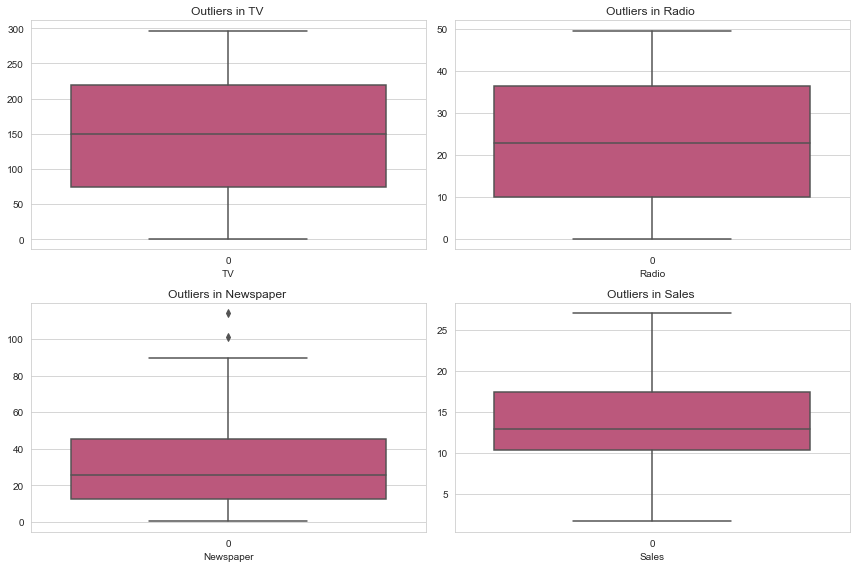

In [139]:
plt.figure(figsize=(12, 8))

columns = {"TV":0 , "Radio":1, "Newspaper":2, "Sales":3}

for col_name,plot  in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=data[col_name],palette='plasma')
    plt.xlabel(col_name)
    plt.title(f"Outliers in {col_name} ")

plt.tight_layout()
plt.show()


# Model Building

## Data Preprocessing & Splitting 

In [141]:
x=data.drop('Sales',axis=1)
y=data.iloc[:,-1]

In [142]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [143]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=44)

In [145]:
x_train.shape

(120, 3)

In [146]:
x_test.shape

(80, 3)

In [147]:
scl=StandardScaler()

In [148]:
x_train=scl.fit_transform(x_train)
x_test=scl.fit_transform(x_test)

## Model Selection & Training 

In [149]:
lr=LinearRegression()

In [150]:
lr.fit(x_train,y_train)

LinearRegression()

In [151]:
ypred=lr.predict(x_train)

In [152]:
ypred2=lr.predict(x_test)

## Model Evaluation

In [153]:
print(f"Mean Squared Error for training set is {MSE(ypred,y_train)/2}")
print(f"R squared Error for testing set is % {r2_score(ypred,y_train)*100}")

Mean Squared Error for training set is 1.5497342544316022
R squared Error for testing set is % 89.45054351632082


In [154]:
print(f"Mean Squared Error for training set is {MSE(ypred2,y_test)/2}")
print(f"R squared Error for testing set is % {r2_score(ypred2,y_test)*100}")

Mean Squared Error for training set is 1.3226888623052697
R squared Error for testing set is % 87.29690109663177


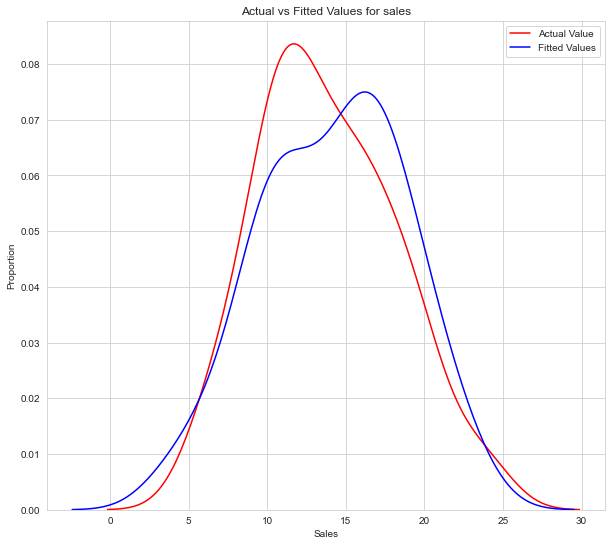

In [156]:
 plt.figure(figsize=(10,9))
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(ypred2, hist=False, color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for sales')
plt.xlabel('Sales')
plt.ylabel('Proportion')
plt.legend()
plt.show()
plt.close()